<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-in-libraries-and-data" data-toc-modified-id="Loading-in-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading in libraries and data</a></span><ul class="toc-item"><li><span><a href="#Delimeter-&quot;\t&quot;-leads-to-a-lot-of-mess" data-toc-modified-id="Delimeter-&quot;\t&quot;-leads-to-a-lot-of-mess-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Delimeter "\t" leads to a lot of mess</a></span><ul class="toc-item"><li><span><a href="#Focus-in-on-Recipient-and-Supplier-column" data-toc-modified-id="Focus-in-on-Recipient-and-Supplier-column-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Focus in on Recipient and Supplier column</a></span></li></ul></li><li><span><a href="#Inserting-new-columns----Supplier" data-toc-modified-id="Inserting-new-columns----Supplier-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inserting new columns -- Supplier</a></span></li><li><span><a href="#Repeating-for-recipient-column" data-toc-modified-id="Repeating-for-recipient-column-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Repeating for recipient column</a></span><ul class="toc-item"><li><span><a href="#With-recipient-and-supplier-separated,-drop-the-combined-column" data-toc-modified-id="With-recipient-and-supplier-separated,-drop-the-combined-column-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>With recipient and supplier separated, drop the combined column</a></span></li></ul></li></ul></li><li><span><a href="#Renaming-columns-appropriately" data-toc-modified-id="Renaming-columns-appropriately-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Renaming columns appropriately</a></span><ul class="toc-item"><li><span><a href="#Forward-fill-repeated-Suppliers" data-toc-modified-id="Forward-fill-repeated-Suppliers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Forward fill repeated Suppliers</a></span><ul class="toc-item"><li><span><a href="##As-the-first-occurrences-are-always-just-indicating-suppliers,-they-can-be-dropped" data-toc-modified-id="#As-the-first-occurrences-are-always-just-indicating-suppliers,-they-can-be-dropped-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>#As the first occurrences are always just indicating suppliers, they can be dropped</a></span></li></ul></li></ul></li><li><span><a href="#Saving-cleaned-df2-to-csv" data-toc-modified-id="Saving-cleaned-df2-to-csv-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saving cleaned df2 to csv</a></span><ul class="toc-item"><li><span><a href="#Forward-filling-recipients-and-not-just-suppliers" data-toc-modified-id="Forward-filling-recipients-and-not-just-suppliers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Forward filling recipients and not just suppliers</a></span></li></ul></li><li><span><a href="#Beginning-work-on-an-OrderYear-time-series" data-toc-modified-id="Beginning-work-on-an-OrderYear-time-series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Beginning work on an OrderYear time series</a></span></li></ul></div>

# Loading in libraries and data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
sns.set_style("dark")
sns.set_context("poster")
# sns.set_context('notebook')

## Delimeter "\t" leads to a lot of mess

In [3]:
df = pd.read_csv('Trade-Register-1950-2019-suppliers copy.txt',delimiter= "\t", index_col=False)

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Focus in on Recipient and Supplier column

In [4]:
df = df.rename(columns={'Unnamed: 0': 'RecipientSupplier'})

In [5]:
df.columns

Index(['RecipientSupplier', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', ' ',
       'Year(s)', 'Unnamed: 6', 'Supplier/', 'Unnamed: 8', 'No.', 'Weapon',
       'Weapon.1', 'Year', 'of', 'No. ', 'Unnamed: 15', 'recipient (R)',
       'ordered', 'designation', 'description', 'of order', 'delivery',
       'delivered', 'Comments'],
      dtype='object')

Get recipients via. finding "R:", drop nans(?), get suppliers at R - 1 before.

In [6]:
recipient_ind = df[df['RecipientSupplier'].str.find("R:") != -1]

recipient_ind

,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26979,R: Iraq,(75),D-30 122mm,Towed gun,(1988),1989-1990,(75),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27029,R: Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
recipient_ind = recipient_ind['RecipientSupplier'].dropna()

recipient_ind

3        R: Burkina Faso
6              R: Angola
11              R: Congo
18            R: Bolivia
46              R: Sudan
              ...       
26962         R: Bolivia
26974        R: Cambodia
26979            R: Iraq
27029         R: Liberia
27032         R: Czechia
Name: RecipientSupplier, Length: 136, dtype: object

In [8]:
recip_ind_list = list(recipient_ind.keys())

supplier_ind_list = [r - 1 for r in recip_ind_list]

supplier_ind_list

[2,
 5,
 10,
 17,
 45,
 48,
 51,
 182,
 287,
 290,
 293,
 296,
 400,
 500,
 505,
 652,
 656,
 751,
 756,
 1286,
 1290,
 1312,
 2221,
 2227,
 2230,
 2234,
 2238,
 2244,
 2247,
 2359,
 2471,
 2549,
 2552,
 2556,
 2574,
 2578,
 2656,
 2661,
 2665,
 2671,
 2674,
 2678,
 2681,
 2762,
 2765,
 5187,
 5190,
 5197,
 6404,
 6408,
 6424,
 6427,
 6430,
 6450,
 6454,
 6532,
 6554,
 6597,
 6614,
 6625,
 7280,
 8209,
 8249,
 8294,
 8312,
 8316,
 8324,
 8333,
 8336,
 8341,
 8403,
 8408,
 8412,
 8415,
 8418,
 8427,
 8431,
 8435,
 8452,
 8461,
 8466,
 8469,
 8472,
 8475,
 9031,
 9059,
 9077,
 9080,
 9083,
 9131,
 9134,
 9270,
 9277,
 9303,
 9307,
 9314,
 9318,
 9429,
 9479,
 9489,
 9532,
 10673,
 10692,
 10695,
 10721,
 10725,
 10771,
 10818,
 10821,
 11047,
 11144,
 11147,
 11152,
 14512,
 14767,
 14770,
 14775,
 15194,
 15504,
 15525,
 15545,
 15550,
 15659,
 15731,
 15735,
 16145,
 18059,
 18062,
 26729,
 26951,
 26955,
 26961,
 26973,
 26978,
 27028,
 27031]

In [9]:
df.head(20)

,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inserting new columns -- Supplier

In [10]:
df.insert(0,'Supplier','')
df

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.loc[supplier_ind_list]

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
2,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26961,,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26973,,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26978,,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27028,,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.loc[recip_ind_list]

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
3,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,,R: Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,,R: Bolivia,(37),M-3/M-5 Half-track,APC,2006,2006,(37),Second-hand; aid; M-5 and M-9 versions,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,,R: Sudan,1,An-32,Transport aircraft,(2005),2006,1,Second-hand; probably; ordered via Ukraine; mo...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,,R: Bolivia,9,F-86F Sabre,Fighter aircraft,(1973),1975,9,Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26974,,R: Cambodia,2,Project-206/Shershen,Patrol craft,(2005),2006,2,Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26979,,R: Iraq,(75),D-30 122mm,Towed gun,(1988),1989-1990,(75),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27029,,R: Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating a dataframe of shifted values to the Suppliers column

In [13]:
shift_df = df.loc[supplier_ind_list, ["Supplier", "RecipientSupplier"]].shift(-1, axis=1, fill_value=" ")

shift_df

,Supplier,RecipientSupplier
2,Albania,
5,Algeria,
10,Angola,
17,Argentina,
45,Armenia,
...,...,...
26961,Venezuela,
26973,Viet Nam,
26978,Yugoslavia,
27028,Zambia,


In [14]:
shift_df.head(20)

,Supplier,RecipientSupplier
2,Albania,
5,Algeria,
10,Angola,
17,Argentina,
45,Armenia,
48,Aruba,
51,Australia,
182,Austria,
287,Bahamas,
290,Bahrain,


Replace original with shifted

In [15]:
df['Supplier'] = shift_df['Supplier']

df.head(20)

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Repeating for recipient column

In [16]:
df.insert(1,'Recipient','')

df

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,Zimbabwe,,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,NaN,,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,NaN,,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
all_recip_list = df.loc[~df.index.isin(supplier_ind_list)]

recip_shift_df = df.loc[all_recip_list.index, ["Recipient", "RecipientSupplier"]].shift(-1, axis=1, fill_value=" ")

recip_shift_df.head(20)

,Recipient,RecipientSupplier
0,NaN,
1,NaN,
3,R: Burkina Faso,
4,NaN,
6,R: Angola,
7,Nigeria,
8,Western Sahara,
9,NaN,
11,R: Congo,
12,Cote d'Ivoire,


In [18]:
df['Recipient'] = recip_shift_df['Recipient']

df.head(20)

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Nigeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Western Sahara,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           136 non-null    object 
 1   Recipient          26762 non-null  object 
 2   RecipientSupplier  26898 non-null  object 
 3   Unnamed: 1         3317 non-null   object 
 4   Unnamed: 2         26649 non-null  object 
 5   Unnamed: 3         26762 non-null  object 
 6                      26762 non-null  object 
 7   Year(s)            26685 non-null  object 
 8   Unnamed: 6         25998 non-null  object 
 9   Supplier/          25540 non-null  object 
 10  Unnamed: 8         18901 non-null  object 
 11  No.                0 non-null      float64
 12  Weapon             0 non-null      float64
 13  Weapon.1           0 non-null      float64
 14  Year               0 non-null      float64
 15  of                 0 non-null      float64
 16  No.                0 n

In [20]:
df1 = df.iloc[:,:-15]

df1

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,Zimbabwe,NaN,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,NaN,R: Czechia,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,NaN
27033,NaN,Zambia,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,NaN


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           136 non-null    object
 1   Recipient          26762 non-null  object
 2   RecipientSupplier  26898 non-null  object
 3   Unnamed: 1         3317 non-null   object
 4   Unnamed: 2         26649 non-null  object
 5   Unnamed: 3         26762 non-null  object
 6                      26762 non-null  object
 7   Year(s)            26685 non-null  object
 8   Unnamed: 6         25998 non-null  object
 9   Supplier/          25540 non-null  object
 10  Unnamed: 8         18901 non-null  object
dtypes: object(11)
memory usage: 2.3+ MB


### With recipient and supplier separated, drop the combined column

In [22]:
df1 = df1.drop('RecipientSupplier',axis=1)

df1.head()

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df1.head(20)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean up the Recipient of R: for consitency

In [24]:
df1['Recipient'] = df1['Recipient'].str.replace(r'R:', '')

df1.head(20)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove blank recipients(what does this mean?)

In [25]:
blank_recipient_list = df1['Recipient'] == '     '

blank_recipient_list

0        False
1        False
2        False
3        False
4        False
         ...  
27030    False
27031    False
27032    False
27033    False
27034     True
Name: Recipient, Length: 27035, dtype: bool

In [26]:
df1.loc[blank_recipient_list] = df1.loc[blank_recipient_list]

df1.loc[blank_recipient_list]

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
13,NaN,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
21,NaN,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters
25,NaN,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand
26,NaN,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid
27,NaN,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid
...,...,...,...,...,...,...,...,...,...,...
27022,NaN,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...
27023,NaN,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain
27025,NaN,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version
27026,NaN,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...


In [27]:
df1.loc[blank_recipient_list] = df1.loc[blank_recipient_list].shift(-1, axis=1, fill_value=" ")

blank_recipient_list

0        False
1        False
2        False
3        False
4        False
         ...  
27030    False
27031    False
27032    False
27033    False
27034     True
Name: Recipient, Length: 27035, dtype: bool

In [28]:
df1.loc[blank_recipient_list]

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels,
21,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters,
25,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand,
26,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid,
27,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid,
...,...,...,...,...,...,...,...,...,...,...
27022,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...,
27023,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain,
27025,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version,
27026,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...,


In [29]:
df1.head(30)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df1.columns

Index(['Supplier', 'Recipient', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', ' ',
       'Year(s)', 'Unnamed: 6', 'Supplier/', 'Unnamed: 8'],
      dtype='object')

# Renaming columns appropriately

In [31]:
df1 = df1.rename(columns={'Unnamed: 1': 'NOrdered','Unnamed: 2': 'NoDesignation', 'Unnamed: 3': 'WeaponDescription',' ':'OrderYear','Year(s)':'DeliveryYear','Unnamed: 6':'NDelivered','Supplier/':'Comments' })

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           23563 non-null  object
 1   Recipient          3335 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26762 non-null  object
 4   WeaponDescription  26762 non-null  object
 5   OrderYear          26762 non-null  object
 6   DeliveryYear       25998 non-null  object
 7   NDelivered         25998 non-null  object
 8   Comments           21701 non-null  object
 9   Unnamed: 8         23427 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [33]:
df1['Unnamed: 8'].value_counts()

     23427
Name: Unnamed: 8, dtype: int64

In [34]:
df1 = df1.drop('Unnamed: 8',axis=1)

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df1 = df1.dropna(how='all')

df1.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand


In [36]:
df1.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,NaN,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [37]:
df1 = df1.replace(r'^\s*$', np.nan, regex=True)

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,NaN,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,NaN,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


## Forward fill repeated Suppliers

In [38]:
df1['Supplier']= df1[['Supplier']].ffill()

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [39]:
df1.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [40]:
(df1.Supplier.values == 'Angola').argmax()

6

In [41]:
df1.Supplier.value_counts()

United States     8666
Soviet Union      3359
France            2421
United Kingdom    1913
Germany           1206
                  ... 
Cyprus               2
Sri Lanka            2
Aruba                2
Armenia              2
Costa Rica           2
Name: Supplier, Length: 136, dtype: int64

### #As the first occurrences are always just indicating suppliers, they can be dropped

In [42]:
first_occur_ind = df1.loc[(~df1.Supplier.duplicated())].index
first_occur_ind

Int64Index([    2,     5,    10,    17,    45,    48,    51,   182,   287,
              290,
            ...
            18059, 18062, 26729, 26951, 26955, 26961, 26973, 26978, 27028,
            27031],
           dtype='int64', length=136)

In [43]:
df2 = df1[~df1.index.isin(first_occur_ind)]

df2.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
14,Angola,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,Second-hand; status uncertain
15,Angola,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,Second-hand; delivered in 1980s as aid to UNIT...
18,Argentina,Bolivia,(37),M-3/M-5 Half-track,APC,2006,2006,(37),Second-hand; aid; M-5 and M-9 versions


# Saving cleaned df2 to csv

In [44]:
df2.to_csv('d2_start.csv', index=False)

In [45]:
df2.DeliveryYear.value_counts(dropna=False)

NaN          764
2019         337
2016         303
1981         300
1975         285
            ... 
1992-2003      1
1963-1985      1
1993-2006      1
1974-1986      1
1983-1993      1
Name: DeliveryYear, Length: 879, dtype: int64

In [46]:
df2[df2.DeliveryYear.isna()][:31]

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
66,Australia,Chile,2,Perry,Frigate,2019,NaN,NaN,Second-hand
68,Australia,NaN,2,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
97,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
106,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
109,Australia,NaN,2,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
124,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
129,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
158,Australia,Timor-Leste,2,Guardian,Patrol craft,(2017),NaN,NaN,Aid; delivery planned 2023
163,Australia,NaN,2,Cape,Patrol craft,2019,NaN,NaN,AUD126 m ($85 m) deal; for coast guard; delive...
166,Australia,UAE,NaN,R-400S,IFV turret,2019,NaN,NaN,AED1.6 b ($316 m) deal; probably incl for Nimr...


In [47]:
len(df2[df2.DeliveryYear.isna()])

764

In [48]:
len(df2[df2.NDelivered.isna()])

764

Delivery years not noted are pending says SIPRI

In [49]:
df2.fillna({'DeliveryYear':'Pending', 'NDelivered':'Pending'}, inplace=True)

len(df2[df2.DeliveryYear.isna()])

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26762 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26762 non-null  object
 1   Recipient          3335 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26762 non-null  object
 4   WeaponDescription  26762 non-null  object
 5   OrderYear          26762 non-null  object
 6   DeliveryYear       26762 non-null  object
 7   NDelivered         26762 non-null  object
 8   Comments           21701 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [51]:
len(df2[df2.NOrdered.isna()])

131

In [52]:
df2[df2.NOrdered.isna()]

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
166,Australia,UAE,NaN,R-400S,IFV turret,2019,Pending,Pending,AED1.6 b ($316 m) deal; probably incl for Nimr...
443,Belgium,NaN,NaN,Cockerill-3105 105mm,Tank turret,2016,2017,(1),For Pandur-2 FSV from Austria
2114,China,NaN,NaN,C-708UNA,Anti-ship missile,2017,Pending,Pending,For S26T submarines
2120,China,NaN,NaN,Yu-8 533mm,AS/ASW torpedo,2017,Pending,Pending,For S26T submarine; designation uncertain (rep...
2149,China,NaN,NaN,SR-5,Self-propelled MRL,(2018),Pending,Pending,NaN
...,...,...,...,...,...,...,...,...,...
25291,United States,NaN,NaN,MIM-104F PAC-3,ABM,(2018),Pending,Pending,Swedish designation Rb-103b
26243,United States,NaN,NaN,FGM-148 Javelin,Anti-tank missile,2018,Pending,Pending,NaN
26345,United States,NaN,NaN,Patriot PAC-3,SAM/ABM system,2018,Pending,Pending,$1.6 b deal
26349,United States,NaN,NaN,RIM-162 ESSM Block-2,SAM,(2019),Pending,Pending,For Gowind-2500 frigates


In [53]:
df2 = df2[df2['NOrdered'].notna()]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          3317 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           21596 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


Lack of comments replaced with "None"

In [54]:
df2['Comments'] = df2["Comments"].fillna("None")



## Forward filling recipients and not just suppliers

In [55]:
df2['Recipient'] = df2['Recipient'].ffill()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           26631 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [56]:
final_df = df2

final_df

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
...,...,...,...,...,...,...,...,...,...
27026,Yugoslavia,Zambia,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...
27029,Zambia,Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery)
27032,Zimbabwe,Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand
27033,Zimbabwe,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           26631 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


# Beginning work on an OrderYear time series

In [58]:
time_df = final_df 

time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [59]:

time_df['OrderYear'] = time_df['OrderYear'].str.replace("[()]", "")

time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,2016,2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [60]:
time_df['OrderYear'] = pd.to_datetime(time_df['OrderYear'])

In [61]:
time_df = time_df.set_index('OrderYear')

In [62]:
time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
OrderYear,,,,,,,,
2011-01-01,Albania,Burkina Faso,(12),M-43 120mm,Mortar,2011,12,Probably second-hand
1980-01-01,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,4,Second-hand; incl for MP
1967-01-01,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1968,(2),Second-hand
2016-01-01,Algeria,Western Sahara,(3),BTR-60PB,APC,2016,(3),Second-hand; aid
1979-01-01,Angola,Congo,1,Noratlas,Transport aircraft,1979,1,Second-hand; aid


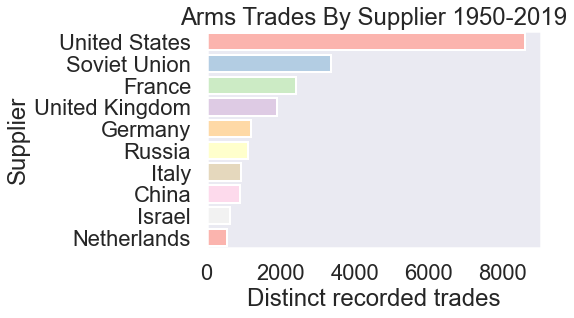

In [63]:
sns.countplot(y="Supplier", saturation=2, data=time_df, palette="Pastel1",
              order=time_df['Supplier'].value_counts().iloc[:10].index)
fig = plt.gcf()
ax = plt.gca()
ax.set_title("Arms Trades By Supplier 1950-2019")
ax.set_xlabel("Distinct recorded trades")
fig.savefig('top_10_suppliers.png',bbox_inches='tight')

In [64]:
time_df.Supplier.value_counts()

United States     8612
Soviet Union      3358
France            2407
United Kingdom    1904
Germany           1201
                  ... 
Cyprus               1
Sri Lanka            1
Aruba                1
Armenia              1
Costa Rica           1
Name: Supplier, Length: 136, dtype: int64

In [65]:
time_df.describe()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
count,26631,26631,26631,26631,26631,26631,26631,26631
unique,136,335,1113,3966,257,877,962,14507
top,United States,India,2,Mi-8MT/Mi-17,APC,Pending,1,None
freq,8612,711,2434,216,1494,652,2300,5035


In [66]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26631 entries, 2011-01-01 to 1964-01-01
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   DeliveryYear       26631 non-null  object
 6   NDelivered         26631 non-null  object
 7   Comments           26631 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [67]:
time_df = time_df.sort_index()

time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
OrderYear,,,,,,,,
1940-01-01,United States,Brazil,16,Mk-30 127mm,Naval gun,1951,16,For 4 Acre destroyers from UK
1940-01-01,United Kingdom,Brazil,4,Acre,Destroyer,1951,4,Produced in Brazil
1943-01-01,Sweden,Switzerland,(234),M/40 105mm,Towed gun,1950-1953,(234),Swiss designation 10.5cm Hb-46; more delivered...
1945-01-01,United Kingdom,Australia,(29),Lincoln,Bomber aircraft,1950-1953,29,Lincoln B-30 version
1945-01-01,France,Spain,18,Steam turbine,Steam engine,1953-1965,18,For 9 Audaz destroyers or frigates produced in...


In [68]:
us_ussr_deals =  final_df[final_df['Supplier'].isin(['United States','Soviet Union'])]

us_ussr_deals.Supplier.value_counts()

United States    8612
Soviet Union     3358
Name: Supplier, dtype: int64

In [69]:
us_ussr_deals.head(10)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
11153,Soviet Union,Albania,(7),Vosper 72ft,FAC,1949-01-01,1950,(7),Second-hand; possibly aid
11154,Soviet Union,Algeria,(70),SU-100,Self-propelled gun,1963-01-01,1964-1966,(70),Second-hand; possibly aid
11155,Soviet Union,Algeria,32,AI-25,Turbofan,1987-01-01,1987-1991,(32),For 32 L-39 trainer aircraft from Czechoslovak...
11156,Soviet Union,Angola,(10),BMD-1,IFV,1988-01-01,1988,(10),Probably second-hand
11157,Soviet Union,Bulgaria,(50),Yak-23,Fighter aircraft,1949-01-01,1950,(50),Second-hand (but not more than 1-2 years old);...
11158,Soviet Union,China,(90),Project-123,FAC,1951-01-01,1951-1955,(90),Probably aid; probably some assembled in China...
11159,Soviet Union,Cuba,18,Project-123,FAC,1962-01-01,1962-1964,(18),Second-hand; probably aid; Project-123K version
11160,Soviet Union,East Germany (GDR),(80),SU-85,Self-propelled gun,1952-01-01,1952,(80),Second-hand; probably aid
11161,Soviet Union,Egypt,(800),T-54,Tank,1967-01-01,1967-1972,(800),"Second-hand, probably aid"
11162,Soviet Union,Ethiopia,(35),BMD-1,IFV,1977-01-01,1977,(35),Second-hand; probably aid


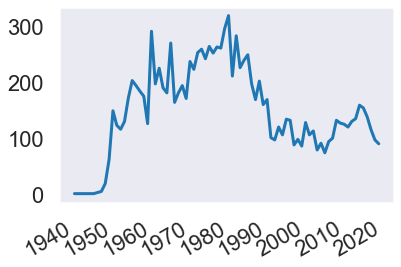

In [70]:
s = us_ussr_deals['OrderYear'].value_counts().sort_index()

s.plot()

In [71]:
bool_df = final_df
bool_df['Supplier'] = bool_df['Supplier'].where(bool_df['Supplier'] == "United States", "Other")

bool_df["Supplier"].value_counts()

Other            18019
United States     8612
Name: Supplier, dtype: int64

In [72]:
bool_df['Supplier']=bool_df.replace({'Supplier' : { 'United States' : 1, 'Other' : 0}})

bool_df["Supplier"].value_counts()

0    18019
1     8612
Name: Supplier, dtype: int64

In [73]:
bool_df.describe()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
count,26631.0,26631,26631,26631,26631,26631,26631,26631,26631
unique,2.0,335,1113,3966,257,77,877,962,14507
top,0.0,India,2,Mi-8MT/Mi-17,APC,1980-01-01 00:00:00,Pending,1,None
freq,18019.0,711,2434,216,1494,610,652,2300,5035
first,NaN,NaN,NaN,NaN,NaN,1940-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN


In [74]:
#replace with mean year of delivery year estimations
bool_df['DeliveryYear'] = bool_df.replace({"DeliveryYear":{"Pending": 0}})
bool_df["DeliveryYear"] = bool_df['DeliveryYear'].astype(str).str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)
                
bool_df.describe()

,DeliveryYear
count,26631.000000
mean,0.323383
std,0.467776
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [75]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,(12),M-43 120mm,Mortar,2011-01-01,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980-01-01,0.0,4,Second-hand; incl for MP
7,0,Nigeria,(2),Il-28,Bomber aircraft,1967-01-01,0.0,(2),Second-hand
8,0,Western Sahara,(3),BTR-60PB,APC,2016-01-01,0.0,(3),Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979-01-01,0.0,1,Second-hand; aid


In [76]:
bool_df['NOrdered'] =  bool_df['NOrdered'].apply(lambda x: x.replace('(','').replace(')','')) 

#convert the string columns to int

bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011-01-01,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980-01-01,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967-01-01,0.0,(2),Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016-01-01,0.0,(3),Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979-01-01,0.0,1,Second-hand; aid


In [77]:
bool_df.NOrdered.value_counts()

2       2938
1       2674
4       1776
3       1484
6       1373
        ... 
1262       1
4460       1
1311       1
334        1
           1
Name: NOrdered, Length: 770, dtype: int64

In [78]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Supplier           26631 non-null  object        
 1   Recipient          26631 non-null  object        
 2   NOrdered           26631 non-null  object        
 3   NoDesignation      26631 non-null  object        
 4   WeaponDescription  26631 non-null  object        
 5   OrderYear          26631 non-null  datetime64[ns]
 6   DeliveryYear       26631 non-null  float64       
 7   NDelivered         26631 non-null  object        
 8   Comments           26631 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 2.0+ MB


In [79]:
non_n_ordered_rows = pd.to_numeric(bool_df['NOrdered'], errors='coerce').isnull()

non_n_ordered_rows

3        False
6        False
7        False
8        False
11       False
         ...  
27026    False
27029    False
27032    False
27033    False
27034    False
Name: NOrdered, Length: 26631, dtype: bool

In [80]:
bool_df['NOrdered'].loc[non_n_ordered_rows] = 0 

bool_df['NOrdered'].loc[non_n_ordered_rows]

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1349     0
1351     0
2109     0
2804     0
2810     0
4485     0
4829     0
5224     0
6170     0
6627     0
6955     0
9578     0
9598     0
10580    0
10719    0
13271    0
13382    0
13389    0
14802    0
16516    0
17388    0
17664    0
Name: NOrdered, dtype: object

In [81]:
bool_df["NOrdered"] = pd.to_numeric(bool_df["NOrdered"])

In [82]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Supplier           26631 non-null  object        
 1   Recipient          26631 non-null  object        
 2   NOrdered           26631 non-null  int64         
 3   NoDesignation      26631 non-null  object        
 4   WeaponDescription  26631 non-null  object        
 5   OrderYear          26631 non-null  datetime64[ns]
 6   DeliveryYear       26631 non-null  float64       
 7   NDelivered         26631 non-null  object        
 8   Comments           26631 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [83]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011-01-01,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980-01-01,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967-01-01,0.0,(2),Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016-01-01,0.0,(3),Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979-01-01,0.0,1,Second-hand; aid


In [84]:
bool_df['NDelivered'] =  bool_df['NDelivered'].apply(lambda x: x.replace('(','').replace(')','')) 

bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011-01-01,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980-01-01,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967-01-01,0.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016-01-01,0.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979-01-01,0.0,1,Second-hand; aid


In [85]:
non_n_deliv_rows = pd.to_numeric(bool_df['NDelivered'], errors='coerce').isnull()

bool_df['NDelivered'].loc[non_n_deliv_rows] = 0 

bool_df["NDelivered"] = pd.to_numeric(bool_df["NDelivered"])

bool_df.head()

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011-01-01,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980-01-01,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967-01-01,0.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016-01-01,0.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979-01-01,0.0,1,Second-hand; aid


In [86]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Supplier           26631 non-null  object        
 1   Recipient          26631 non-null  object        
 2   NOrdered           26631 non-null  int64         
 3   NoDesignation      26631 non-null  object        
 4   WeaponDescription  26631 non-null  object        
 5   OrderYear          26631 non-null  datetime64[ns]
 6   DeliveryYear       26631 non-null  float64       
 7   NDelivered         26631 non-null  int64         
 8   Comments           26631 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 2.0+ MB


In [87]:
learn_df = bool_df

learn_df= learn_df.drop(columns=['NoDesignation','Comments'],axis=1)

learn_df.head()

,Supplier,Recipient,NOrdered,WeaponDescription,OrderYear,DeliveryYear,NDelivered
3,0,Burkina Faso,12,Mortar,2011-01-01,0.0,12
6,0,Angola,4,Transport aircraft,1980-01-01,0.0,4
7,0,Nigeria,2,Bomber aircraft,1967-01-01,0.0,2
8,0,Western Sahara,3,APC,2016-01-01,0.0,3
11,0,Congo,1,Transport aircraft,1979-01-01,0.0,1


In [88]:
learn_df = pd.get_dummies(learn_df, columns=['Recipient',"WeaponDescription","OrderYear"],drop_first=True)

learn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Columns: 670 entries, Supplier to OrderYear_2019-01-01 00:00:00
dtypes: float64(1), int64(2), object(1), uint8(666)
memory usage: 17.9+ MB


In [106]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import mean_squared_error

In [107]:
y = learn_df['Supplier']
X = learn_df.drop("Supplier",axis=1)

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [109]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [110]:
xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [111]:
y_pred = xgb_model.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: unknown is not supported

21587    1
9170     0
18874    1
16571    0
20741    1
        ..
20282    1
8868     0
14229    0
11611    0
16078    0
Name: Supplier, Length: 5327, dtype: object